## Оптимизация гиперпараметров

Материал этой лекции - процесс оптимизации гиперпараметров. Сначала мы обсудим настройку гиперпараметров в целом и способы настройки гиперпараметров и что на самом деле означает понимание того, как конкретный гиперпараметр влияет на модель. Кроме того, рассмотрим какие есть инструменты для настройки гиперпараметров и в чем их отличия. Говорить будем, в первую очередь, о моделях, основанных на деревьях, о случайном лесе и градиетном бустинге. В конце, поговорим о линейных моделях.

## Что наиболее важно понимать при настройки гиперпараметров?

__Во-первых__, любая модель содержит гиперпараметры, которые нужно настраивать для каждой задачи. Наша задача состоит в том, __какие параметры сильнее всего__ влияют на модель; Так или иначе, все гиперпараметры оказывают влияние на работу модели, но мы хотим выбрать __самые важные__, поскольку у нас нет времени на настройку всех гиперпараметров. 

__Например__, мы хотим начать использовать библиотеку `xgboost` и пытаемся понять какие гиперпараметры лучше всего настроить, хотя можем не знать как работают алгоритмы градиетного бустинга вообще. Мы можем поискать какие параметры задаются при использовании `xgboost`, например исследуя работы на `GitHub` или `kaggle kernels`. Кроме того, в документации алгоритмов, обычно, явно указано какие гиперпараметры нужно настраивать в первую очередь.

__Во-вторых__, нужно понимать как изменение того или иного гиперпараметра повлияет на процесс обучения модели.

__В-третьих__, настроить гиперпараметры вручную или с использованием готового фреймворка для оптимизации гиперпараметров. Фреймворков для оптимизации очень много:

* Optuna
* HyperOpt
* Bayesian-Optimization
* Scikit-optimize
* Spearmint
* GPyOpt
* RoBo

Все библиотеки для оптимизации гиперпараметров достаточно просты в использовании. Нам нужно определить функцию, которая будет запускать модель для обучения и вернет значение метрики качества. Во-вторых, нужно указать пространство для поиска оптимальных значений гиперпараметров: название гиперпараметров и пространство поиска.

__Нужно понимать__, что оптимизация гиперпараметров - может занять много времени, поэтому лучшая стратегия - запустить на ночь. Мы будем говорить, в основном, об оптимизации гиперпараметров для моделей, основанных на деревьях решений. Сегодня модели `XGBoost` и `LightGBM` являются стандартом в соревнованиях по анализу данных, как и в промышленных задачах. Кроме того, достаточно популярны модели `RandomForest` и `ExtraTrees` из `sklearn`. Это мощные модели могут использоваться вместе.

Начнем с обсуждения гиперпараметров для моделей градиетного бустинга.

## Гиперпараметры для градиетного бустинга

__Во-первых__, есть мноеёжество параметров, которые влияют на процесс построения дерева. Параметр `max_depth` - максимальная глабина дерева, чем более глубокое дерево мы строим, тем сильнее оно подгоняется под данных. Таким образом, увеличение этого гиперпараметра приводит к более быстрой подгонке к обучающему набору данных. В зависимости от задачи оптимальная глубина дерева может сильно варьироваться, иногда она может быть равной 2, а иногда - 10. Если увеличение глубины дерева не приводит к переобучению модели, то есть модель становится все лучше и лучше, это может говорить о том, что из данных требуется извлечь много __важных взаимодействий__. Так что лучше не настраивать гиперпараметры, а попробовать создать новых признаков. 

Базовый `max_depth` может быть установлен в 6. Помните, что по мере увеличение глубины дерева - модель становится более сложно и требует больше времени на обучение, поэтому не стоит указывать высокие значения, если вы не уверены на 100%, что это поможет модели. Для `LightGBM` более важным параметром является не `max_depth`, а `num_leaves` - это число листьев дерева. Это более гибкое условие для настройки, поскольку дерева может быть более глубоким, но не иметь большого количества листьев, и не быть переобученным.

Всопмним, что модели на деревьях обучаются на бутстрап-выборках, для снятия корреляции между отдельными деревьями. Таким образом, мы дополнительно можем влиять на размер выборки, который используется для отдельного дерева, если будем использовать только часть объектов - то модель будет меньше склонной к переобучению. В каком-то смысле, это дополнительная регуляризация. За долю выборки, которая используется при обучении, отвечает параметр `subsample`. Такая же идея может быть применена и для признаков. За долю признаков отвечают параметры `colsample_bytree` и `colsample_bylevel`. Если модель переобучается, то имеет смысл __уменьшать значения этих гиперпараметров__. Есть и другие гиперпараметры, которые используются для регуляризаци: `min_child_weight`, `lambda`, `alpha` и другие. __Самый важный__ - `min_child_weight`. Если мы его увеличиваем, то повышаем значение регуляризации, и модель становится более консервативной. Если опустить значение до 0, то модель будем максимально сложной. __Это один из самых важных гиперпараметров__ для настройки регуляризации модели. Оптимальные значения очень сильно зависят от задачи, и могут лежат в диапазоне 0, 5, 15, ..., 300, поэтому стоит исследовать широкий интервал. Все гиперпараметры, которые мы обсудили, __относятся к отдельному дереву__.

Теперь поговорим про __гиперпараметры композиции алгоритма__, которые очень тесно связаны между собой `eta` и `num_rounds`, это скорость обучения и количество итераций обучения или число деревьев, которые мы строим. С каждой итерацией мы строим новое дерево и добавляем его к обшей композиции со скоростью обучения `eta`. Чем выше скорость обучения - тем быстрее модель подгоняется под обучающей данные, что может привести к переобучению и при слишком высокой скорости обучения модель может разойтись. Таким образом, нам нужно использовать достаточно маленькую скорость обучения, с другой стороны, если скорость обучения будет слишком маленькой, то модель не будет хорошей даже после большого колчиества итерацией. В начале работы над соревнованием, не стоит использовать слишком маленькую скорость обучения, оптимальным значением будет - `0.05 - 0.01`, в конце соревнования имеет смысл попробовать уменьшить скорость обучения и постараться добиться улучшения качества модели. Вначале, мы фиксируем скорость обучения, а после этого - определяем количество итераций, необходимых для обучения. Обычно, для этого мы используем `early_stopping`, мы мониторим значение метрики качества на валидационной выборке и прерываем обучение, когда метрика качества начинает ухудшаться.

__Полезный хак__, когда мы определили оптимальное количество итераций, мы можем умножить количество итераций на коэффициент `alpha`, и в то же время, поделить скорость обучения на `alpha`.

|Название гиперпараметра|XGBoost|LightGBM|
|---|---|---|
|Глубина дерева| max_depth | num_leaves / max_depth |
|Доля выборки, используемая при обучении| subsample | bagging_fraction |
|Доля признаков, используемая при обучении| colsample_bytree / colsample_bylevel | feature_fraction |
|Регуляризация| min_child_weight, lambda, alpha, gamma | min_data_in_leaf, lambda_l1, labmda_l2 |
|Скорость обучения| eta | learning_rate |
|Количество итераций обучения| num_rounds | num_iterations |


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("data/porto-seguro-safe-driver-prediction/train.csv")
data.head(n=2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


In [3]:
RATIO = 0.2
data = data.sample(frac=RATIO, random_state=27)

x_train, x_valid = train_test_split(
    data.drop(["id", "target"], axis=1), train_size=0.7, random_state=27
)
y_train, y_valid = train_test_split(
    data["target"], train_size=0.7, random_state=27
)

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 83329 rows, 57 cols
x_valid.shape = 35713 rows, 57 cols


## Baseline XGBoost-classifier

In [22]:
%%time

params = {
    "booster": "gbtree",
    "eval_metric": "auc",
    "objective": "binary:logistic",
    "learning_rate": 0.01,
    "nthread": 6,
    "seed": 27
}

dtrain = xgb.DMatrix(
    x_train, y_train
)
dvalid = xgb.DMatrix(
    x_valid, y_valid
)

model = xgb.train(
    params=params,
    dtrain=dtrain,
    evals=[(dtrain, "dtrain"), (dvalid, "dvalid")],
    early_stopping_rounds=25,
    num_boost_round=1000,
    verbose_eval=10,
    maximize=True,
)

[0]	dtrain-auc:0.594076	dvalid-auc:0.581882
Multiple eval metrics have been passed: 'dvalid-auc' will be used for early stopping.

Will train until dvalid-auc hasn't improved in 25 rounds.
[10]	dtrain-auc:0.610179	dvalid-auc:0.595202
[20]	dtrain-auc:0.619565	dvalid-auc:0.60054
[30]	dtrain-auc:0.629229	dvalid-auc:0.60549
[40]	dtrain-auc:0.631182	dvalid-auc:0.606375
[50]	dtrain-auc:0.633759	dvalid-auc:0.607056
[60]	dtrain-auc:0.637865	dvalid-auc:0.607836
[70]	dtrain-auc:0.642969	dvalid-auc:0.609833
[80]	dtrain-auc:0.647278	dvalid-auc:0.61112
[90]	dtrain-auc:0.65034	dvalid-auc:0.612302
[100]	dtrain-auc:0.65238	dvalid-auc:0.612981
[110]	dtrain-auc:0.655627	dvalid-auc:0.61423
[120]	dtrain-auc:0.658332	dvalid-auc:0.61464
[130]	dtrain-auc:0.660733	dvalid-auc:0.615202
[140]	dtrain-auc:0.662683	dvalid-auc:0.615579
[150]	dtrain-auc:0.664734	dvalid-auc:0.615884
[160]	dtrain-auc:0.667162	dvalid-auc:0.615548
[170]	dtrain-auc:0.670551	dvalid-auc:0.615838
[180]	dtrain-auc:0.674321	dvalid-auc:0.616217

## Как работает Байесовская оптимизация?

__Часть 1__ - `Определение целевой функции` - определить целевую функцию, которая принимает гиперпараметры в качестве входных параметров и возвращает оценку качества решения задачи, которую следует максимизировать или минимизировать.

__Часть 2__ - `Определение пространства поиска гиперпараметров` - определить диапазон гиперпараметров для оптимизации. Для получения лучших результатов лучше использовать узкий диапазон параметров.

__Часть 3__ - `Определение суррогатную модели целевой функции и вызвать ее на оптимизацию` - сделать байесовскую функцию оптимизации и вызвать ее, чтобы максимизировать целевкую метрику. 

Функция байесовской оптимизации принимает 3 параметра: `целевая функция`, `пространство поиска` и `random_state`.
Давайте реализуем байесовскую оптимизацию для улучшения алгоритмов машинного обучения.

In [26]:
def xgboost_optimize_params(max_depth, min_child_weights, colsample_bytree):

    params["max_depth"] = int(max_depth)
    params["min_child_weights"] = int(min_child_weights)
    params["colsample_bytree"] = colsample_bytree

    model = xgb.train(
        params=params,
        dtrain=dtrain,
        evals=[(dtrain, "dtrain"), (dvalid, "dvalid")],
        early_stopping_rounds=25,
        num_boost_round=1000,
        verbose_eval=10,
        maximize=True,
    )

    return roc_auc_score(y_valid, model.predict(dvalid))

In [28]:
params_search = {
    "max_depth": (3, 8),
    "min_child_weights": (5, 500),
    "colsample_bytree": (0.3, 0.9)
}

xgb_params_search = BayesianOptimization(
    xgboost_optimize_params,
    pbounds=params_search,
    random_state=27
)
xgb_params_search.maximize(
    init_points=3, n_iter=5, acq='ei'
)

|   iter    |  target   | colsam... | max_depth | min_ch... |
-------------------------------------------------------------
[0]	dtrain-auc:0.597342	dvalid-auc:0.588952
Multiple eval metrics have been passed: 'dvalid-auc' will be used for early stopping.

Will train until dvalid-auc hasn't improved in 25 rounds.
[10]	dtrain-auc:0.627153	dvalid-auc:0.612327
[20]	dtrain-auc:0.638873	dvalid-auc:0.615475
[30]	dtrain-auc:0.647524	dvalid-auc:0.615537
[40]	dtrain-auc:0.655074	dvalid-auc:0.616319
[50]	dtrain-auc:0.66156	dvalid-auc:0.617492
[60]	dtrain-auc:0.666288	dvalid-auc:0.61847
[70]	dtrain-auc:0.672245	dvalid-auc:0.618832
[80]	dtrain-auc:0.674824	dvalid-auc:0.619711
[90]	dtrain-auc:0.679632	dvalid-auc:0.620435
[100]	dtrain-auc:0.684324	dvalid-auc:0.621467
[110]	dtrain-auc:0.690688	dvalid-auc:0.622756
[120]	dtrain-auc:0.694054	dvalid-auc:0.623185
[130]	dtrain-auc:0.699821	dvalid-auc:0.623348
[140]	dtrain-auc:0.705737	dvalid-auc:0.623417
[150]	dtrain-auc:0.710457	dvalid-auc:0.623815
[160]	dt

[230]	dtrain-auc:0.743936	dvalid-auc:0.629111
[240]	dtrain-auc:0.748362	dvalid-auc:0.628827
Stopping. Best iteration:
[218]	dtrain-auc:0.737925	dvalid-auc:0.629342

|  5        |  0.6285   |  0.4002   |  7.982    |  192.6    |
[0]	dtrain-auc:0.60271	dvalid-auc:0.583234
Multiple eval metrics have been passed: 'dvalid-auc' will be used for early stopping.

Will train until dvalid-auc hasn't improved in 25 rounds.
[10]	dtrain-auc:0.627104	dvalid-auc:0.605739
[20]	dtrain-auc:0.62932	dvalid-auc:0.603888
[30]	dtrain-auc:0.635826	dvalid-auc:0.607477
[40]	dtrain-auc:0.642693	dvalid-auc:0.609048
[50]	dtrain-auc:0.645752	dvalid-auc:0.609319
[60]	dtrain-auc:0.653327	dvalid-auc:0.612005
[70]	dtrain-auc:0.658245	dvalid-auc:0.612832
[80]	dtrain-auc:0.664007	dvalid-auc:0.614041
[90]	dtrain-auc:0.666735	dvalid-auc:0.614416
[100]	dtrain-auc:0.669642	dvalid-auc:0.614
[110]	dtrain-auc:0.676309	dvalid-auc:0.614956
[120]	dtrain-auc:0.682189	dvalid-auc:0.614801
[130]	dtrain-auc:0.687675	dvalid-auc:0.615524


In [36]:
optimal_xgb_params = xgb_params_search.max

## RandomForest / ExtraTrees

`ExtraTrees` - это просто более рандомизированная версия RandomForest с теми же параметрами, в `ExtraTrees` используются полностью рандомизированные деревья решения, в которых порог и признак для сплита выбираются случайно. Учитывая, что в `RandomForest` каждое дерево строится независимо друг от друга, это означает, что увеличение числа деревье не приводит к переобучению модели, в отличии, от моделей градиетного бустинга.

В `sklearn` количество деревьев для модели случайного леса контролируется параметром `n_estimators`. Обычно, в начале стоит определить количество деревьев, достаточно для обучения. Так как все деревья строятся независимо друг от друга, построение отдельных деревьев можно очень удачно распараллелить, и модель обучается достаточно быстро. Обычно, сначала имеет смысл установить `n_estimators` в очень маленькое значение, например 25-50, и оценить время, необходимое для обучения модели. Если скорость обучения модели приемлимая, можно установить очень большое значение `n_estimators`, например 300 - 500, после этого имеем сымсл отобрасить график зависимости ошибки от количества деревьев.

Как и в модели градиетного бустинга, для случайного леса можно настроить гиперпараметр `max_depth`, который отвечает за глубину деревьев. Обычно, имеет смысл в начале установить компромиссное значение 8-10 для старта, однако иногда деревья могут быть сильно глубокими, и значение `max_depth` можно установить в __None__, что соответствует неограниченной глубине. Это может быть полезно, если признаки в датасете имеют повторяющиеся значения и важные взаимодейсвтия. Но имейте в виду, что модель может быть склонной к переобучению. Как правило, глубина деревьев для случайного леса __требуется выше__, чем для градиетного бустинга. По аналогии, с градиетного бустингом, `max_features` - доля признаков, которые используются при обучении, а `min_samples_leaf` - параметр, отвечающий за регуляризацию модели, аналогично `min_child_weight` / `min_data_in_leaf` в моделях `XGBoost` / `LightGBM`.

In [4]:
model = RandomForestClassifier(
    n_estimators=250, max_depth=8, n_jobs=6, random_state=27
)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=6,
                       oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

In [5]:
train_scores, valid_scores = [], []
train_predictions = np.zeros(shape=(x_train.shape[0], model.n_estimators))
valid_predictions = np.zeros(shape=(x_valid.shape[0], model.n_estimators))

for num, estimator in enumerate(model.estimators_):
    train_predictions[:, num] = estimator.predict_proba(x_train)[:, 1]
    valid_predictions[:, num] = estimator.predict_proba(x_valid)[:, 1]

In [6]:
train_predictions = np.cumsum(train_predictions, axis=1) / np.arange(1, train_predictions.shape[1]+1)
valid_predictions = np.cumsum(valid_predictions, axis=1) / np.arange(1, valid_predictions.shape[1]+1)

In [7]:
train_scores = [
    roc_auc_score(y_train, train_predictions[:, num]) for num in range(train_predictions.shape[1])
]
valid_scores = [
    roc_auc_score(y_valid, valid_predictions[:, num]) for num in range(valid_predictions.shape[1])
]

(0, 250)

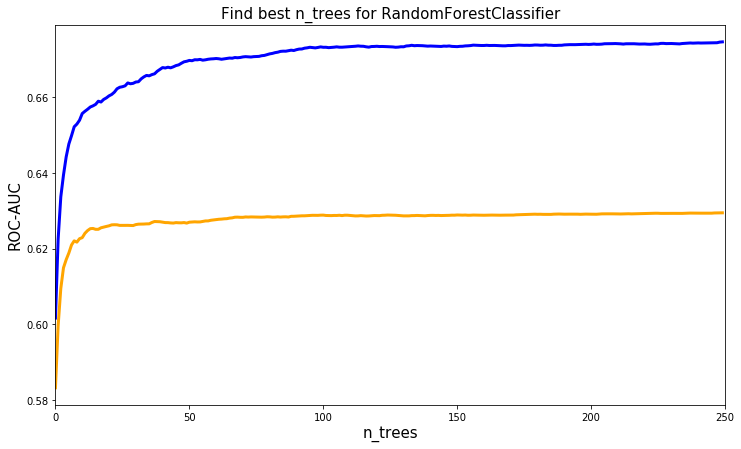

In [8]:
fig = plt.figure(figsize=(12, 7))

plt.title("Find best n_trees for RandomForestClassifier", size=15)
plt.plot(train_scores, linewidth=3, label="train-score", color="blue")
plt.plot(valid_scores, linewidth=3, label="valid-score", color="orange")
plt.xlabel("n_trees", size=15)
plt.ylabel("ROC-AUC", size=15)
plt.xlim(0, len(train_scores))

## Линейные модели

Гиперпараметры, которые нам обычно нужны для настройки линейных моделей - это регуляризация весов $L_2$ и $L_1$. __Важно__ помнить, что параметр `C` в линейных моделях `sklearn` обратно пропорционален весу регуляризации, поэтому динамика противоположна. На самом деле нам не нужно думать о значении параметров в случае одного параметра, верно? Мы просто пробуем несколько значений и находим тот, который работает лучше всего. Обычно, можно начать с очень маленького начального значения, скажем, `10e-6`, а затем увеличивать его, каждый раз умножая на коэффициент 10. 

__Какой тип регуляризации, L1 или L2, вы выберете?__ Собственно, мой ответ - попробовать оба. На мой взгляд, на самом деле они очень похожи, и одно преимущество, которое может дать нам $L_1$, - это разреженность весов, поэтому разреженные веса можно использовать для отбора признаков. __Общий совет__, который я хочу здесь дать, не тратьте слишком много времени на настройку гиперпараметров, особенно когда соревнование только начинается. __Вы не можете выиграть соревнование, настроив параметры__. 

__Полезный хак__: усреднять все. При отправке решения, построить пять моделей, начиная с разных случайных инициализаций, и усреднить их прогнозы. На самом деле это очень помогает, и некоторые люди усредняют не только случайное начальное приближение, но и другие параметры вокруг оптимального значения. __Например__, если оптимальная глубина для модели на деревьях равна 5, мы можем усреднить это модель с моделями с глубиной 3, 4 и 5. Но это тема дальнейшего материала лекции :)

In [58]:
pipeline = Pipeline(
    steps=[
        ("scaling", StandardScaler()),
        ("estimator", LogisticRegression(random_state=1, solver="liblinear"))
    ]
)

In [59]:
train_scores, valid_scores = [], []

params_grid = {
    "penalty": ["l1", "l2"],
    "C": [10e-3, 10e-2, 10e-1, 1, 10, 100, 1000]
}

for penalty in params_grid["penalty"]:
    scores_penalty_train, scores_penalty_valid = [], []
    pipeline.named_steps["estimator"].penalty = penalty
    for c in params_grid["C"]:
        pipeline.named_steps["estimator"].C = c
        pipeline.fit(x_train, y_train)

        train_pred = pipeline.predict_proba(x_train)[:, 1]
        valid_pred = pipeline.predict_proba(x_valid)[:, 1]

        scores_penalty_train.append(
            roc_auc_score(y_train, train_pred)
        )
        scores_penalty_valid.append(
            roc_auc_score(y_valid, valid_pred)
        )

    train_scores.append(scores_penalty_train)
    valid_scores.append(scores_penalty_valid)

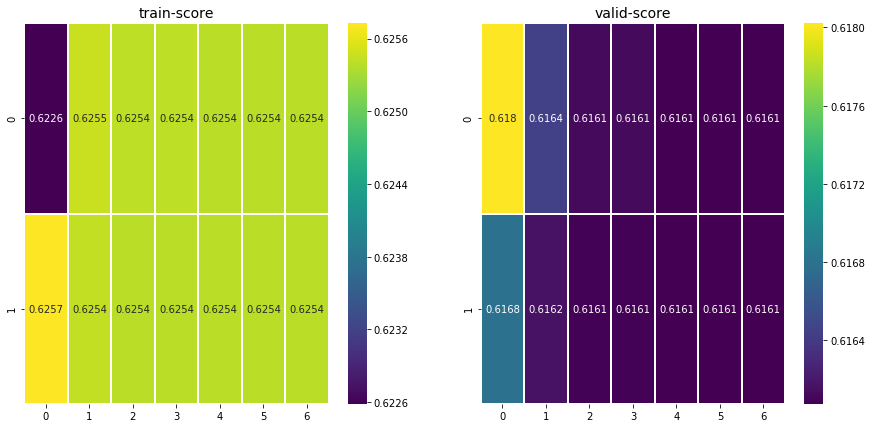

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].set_ylabel("penalty", fontsize=14)
axes[0].set_title("train-score", fontsize=14)
sns.heatmap(train_scores, annot=True, linewidths=1, fmt=".4g", cmap="viridis", ax=axes[0])

axes[1].set_ylabel("penalty", fontsize=14)
axes[1].set_title("valid-score", fontsize=14)
sns.heatmap(valid_scores, annot=True, linewidths=1, fmt=".4g", cmap="viridis", ax=axes[1])

## Ансамблирование моделей

__Ансамбль__ методов в статистике и машинном обучении использует несколько обучающих алгоритмов с целью получения лучшей эффективности прогнозирования, чем могли бы получить от каждого обучающего алгоритма по отдельности. Так что же такое ансамблирование? Под эти термином мы подразумеваем объединение множества различных моделей машинного обучения для получения более точного прогноза. Существуют различные ансамблевые методы, многие их которых регулярно используются в соревнованиях по машинному обучению, и как правило, оказываются достаточно конкурентноспособными.  Мы начнем с простых методов усреднения, затем перейдем к методам взвешенного усреднения. А затем мы перейдем к более типичным методам, таким как бэггинг или очень популярная технология, стэкинга.

__Основная идея__ - использовать модели, близкие по качеству, но отличающиеся по природе / выборке, на которой обучались / степени регуляризации / подходу к созданию признаков / подходу к обработке категорий / ..., для взаимной компенсации ошибок друг друга и улучшения качества итоговой композиции.

* __Бэггинг__ - мы хотим подобрать несколько независимых моделей и усреднить их прогнозы, чтобы получить модель с меньшей дисперсией. На практике, мы не можем подобрать полностью независимые модели, потому что для этого требуется слишком много данных, а нащ датасет является ограниченным. Таким образом, мы должны снизить корреляции между моделями, в надежде снизить общую дисперсию. Можем использовать _бутстрап_ выборки для создания независимых моделей, после чего "усреднить" прогнозы всех моделей. Или 


* __Арифмитическое среднее__ - усреднее прогнозов моделей, похожих по значению метрики качества, не коррелированных друг с другом. Выделяют также __взвешенное__ усреднее - веса подбираются вручную или с использованием `scipy.optimize`.


* __Стэкинг__ - использование прогнозов базовых моделей в качестве признаков или в дополнении к основным признакам, и обучение модели второго уровня на такой матрице признаков. Корреляция = 0.98, качество отдельных моделей - близко, модели / признаки / гиперпараметры как можно более разные.

In [ ]:
0.8
0.79
0.78 -> 0.5*x1 + 0.3*x2 + 0.2*x1

rankdata -> roc_auc_score
gmean > amean

In [ ]:
OOF_Catboost; OOF_XGBoost; OOF_LightGBM; OOF_NN;-> LogisticRegression / XGBoost / .... /
OOF_Catboost; OOF_XGBoost; OOF_LightGBM; OOF_NN; external_scoring_rating_1; external_scoring_rating_2; external_scoring_rating_3

In [ ]:
def save():
    # директорию с решением
    # OOF - прогнозы
    # submit.csv
    # модели
    # данные
    # код
    # зависимости -> requirements.txt
    pass